<a href="https://colab.research.google.com/github/yblair85/csc302/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

olympic_medals = pd.read_csv('/content/drive/MyDrive/DATA/olympic_medals.csv')

**Q1** Please use Pandas to read olympic_medals.csv and use parallel_categories function from plotly.express to visualize proportions of medal type for each gender from since year 2000. Please see the example in the Python notebook we walked through in the class.

In [8]:
# Import required libraries
import pandas as pd
import plotly.express as px

# Read the olympic_medals.csv file from your Google Drive path
olympic_medals = pd.read_csv('/content/drive/MyDrive/DATA/olympic_medals.csv')

# Filter data for years since 2000
olympic_medals_filtered = olympic_medals[olympic_medals['Year'] >= 2000]

# Create the parallel categories plot
fig = px.parallel_categories(
    olympic_medals_filtered,
    dimensions=['Gender', 'Medal'],
    title='Proportions of Medal Types by Gender Since 2000',
    labels={'Gender': 'Gender', 'Medal': 'Medal Type'}
)

# Display the plot
fig.show()


In [9]:
# Import required libraries
import pandas as pd
import plotly.express as px

# Read the olympic_medals.csv file from your Google Drive path
olympic_medals = pd.read_csv('/content/drive/MyDrive/DATA/olympic_medals.csv')

# Filter data for years since 2000
olympic_medals_filtered = olympic_medals[olympic_medals['Year'] >= 2000]

# Create the parallel categories plot with a nice color scale
fig = px.parallel_categories(
    olympic_medals_filtered,
    dimensions=['Gender', 'Medal'],
    color='Year',  # Use Year column to color the lines
    title='Proportions of Medal Types by Gender Since 2000 (Colored by Year)',
    labels={'Gender': 'Gender', 'Medal': 'Medal Type', 'Year': 'Year'},
    color_continuous_scale=px.colors.sequential.Viridis  # Nice, vibrant color scale
)

# Adjust layout for better visibility
fig.update_layout(
    width=800,  # Slightly larger figure
    height=600,
    title_x=0.5  # Center the title
)

# Display the plot
fig.show()





**Q2** Please inspect the code below and observe how values are plotted by running it. Then, read the 2016elections.csv from the DATA folder and select rows for AR, MI, CA, and WI. Then, utilize stacked bar plot, to stack vote percentages for Trump, Clinton, Johnson, and Others. Please see 'pct_clinton',	'pct_trump',	'pct_johnson',	'pct_other' columns. Make sure that your x tick labels are those four states above.

Text(0.5, 1.0, 'Monthly Temperatures in a year')

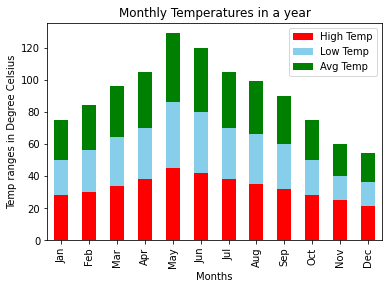

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create DataFrame
df = pd.DataFrame({'High Temp': [28, 30, 34, 38, 45, 42,
                                 38, 35, 32, 28, 25, 21],
                   'Low Temp': [22, 26, 30, 32, 41, 38,
                                32, 31, 28, 22, 15, 15],
                   'Avg Temp': [25, 28, 32, 35, 43, 40,
                                35, 33, 30, 25, 20, 18]},
                  index=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                         'Nov', 'Dec'])


# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])

# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Temp ranges in Degree Celsius')

# title of plot
plt.title('Monthly Temperatures in a year')

Columns in the CSV: ['state', 'st', 'fips', 'total_vote', 'vote_margin', 'winner', 'party', 'pct_margin', 'r_points', 'd_points', 'pct_clinton', 'pct_trump', 'pct_johnson', 'pct_other', 'clinton_vote', 'trump_vote', 'johnson_vote', 'other_vote', 'ev_dem', 'ev_rep', 'ev_oth', 'census']
Filtered DataFrame:
          state  st  fips  total_vote  vote_margin   winner       party  \
3     Arkansas  AR     5     1130635       304378    Trump  Republican   
4   California  CA     6    14237893      4269978  Clinton  Democratic   
22    Michigan  MI    26     4824542        10704    Trump  Republican   
49   Wisconsin  WI    55     2976150        22748    Trump  Republican   

    pct_margin  r_points  d_points  ...  pct_johnson  pct_other  clinton_vote  \
3       0.2692     26.92    -26.92  ...         2.64       3.13        380494   
4       0.2999    -29.99     29.99  ...         3.36       3.66       8753792   
22      0.0022      0.22     -0.22  ...         3.57       2.16       2268839  

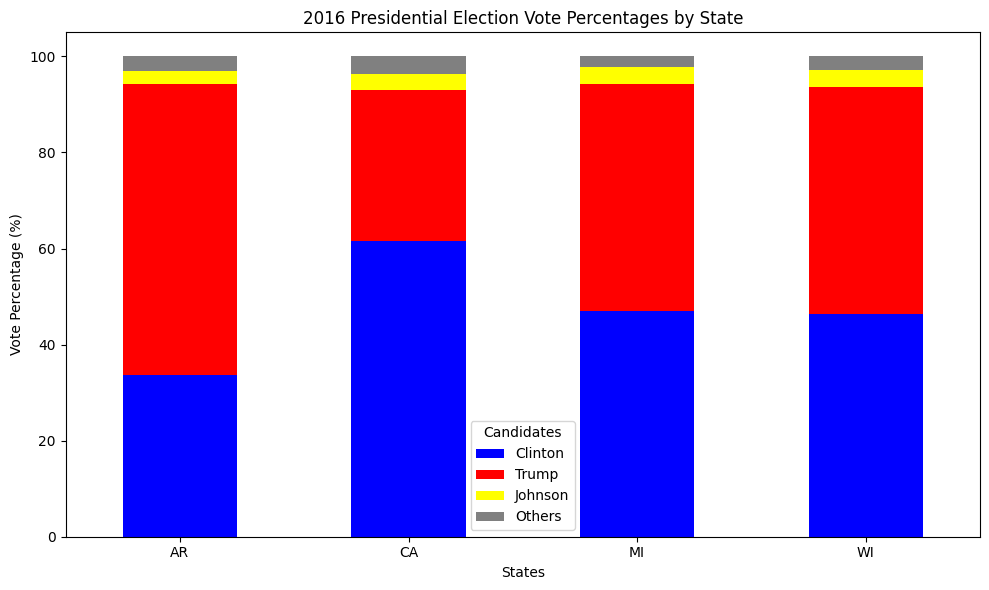

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file using the provided path
df = pd.read_csv('/content/drive/MyDrive/DATA/2016elections.csv')

print("Columns in the CSV:", df.columns.tolist())

# Filter for AR, MI, CA, WI using the 'st' column
states = ['AR', 'MI', 'CA', 'WI']
df_filtered = df[df['st'].isin(states)]

# Check if filtering worked
print("Filtered DataFrame:\n", df_filtered)

# Select relevant columns and set index to 'st'
df_plot = df_filtered[['st', 'pct_clinton', 'pct_trump', 'pct_johnson', 'pct_other']].set_index('st')

# Create stacked bar chart
df_plot.plot(kind='bar', stacked=True, color=['blue', 'red', 'yellow', 'gray'], figsize=(10, 6))

# Customize labels and title
plt.xlabel('States')
plt.ylabel('Vote Percentage (%)')
plt.title('2016 Presidential Election Vote Percentages by State')
plt.legend(['Clinton', 'Trump', 'Johnson', 'Others'], title='Candidates')
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()